# The Beauty of Data Visualization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

---

## 1. Dataviz can be POWERFUL (and freaking cool!)

<img src="creative-line-chart.png" style="width: 800px;"/>


https://www.vox.com/2014/12/29/7463663/twitter-news-2014

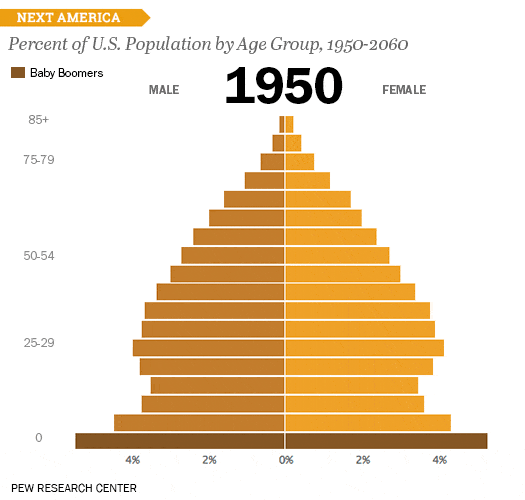

In [2]:
Image(filename='creative-bar-chart.gif') 

<img src="creative-stacked-bar-chart.png" style="width: 800px;"/>

---

## 2. Dataviz can be POWERFUL (and dangerous / misinformative!)

Examples of bad practices:
- omitting the baseline (starting y axis not at 0)
- only picking part of the data to show
- using a graph that makes things look more alike than they are (like a pie chart)
- https://venngage.com/blog/misleading-graphs/

<img src="bad-data-viz-1.png" style="width: 600px;"/>

<img src="bad-data-viz-2.png" style="width: 600px;"/>

---

## 3. So How Should We NOT Do Dataviz?

### 1. Don't make dangerous / misleading dataviz (see above)

### 2. Don't Make Messy Dataviz

<img src="messy-data-viz.png" style="width: 600px;"/>


### 3. Choose the correct type of visual!
(AKA Never Use a Pie Chart)

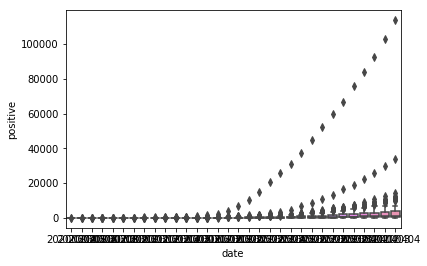

In [3]:
#this might look cool but... What am I even looking at?
#also maybe a boxplot isn't the right choice here...
#can I even see what's on the x-axis?
covidDF = pd.read_csv("dailyCOVID.csv").sort_values(by='date')
sb.boxplot(x=covidDF["date"], y=covidDF["positive"])

#Which of these elements in the pie chart has the largest value? (DON'T PEEK BELOW!)
<img src="pie-chart.png" style="width: 600px;"/>

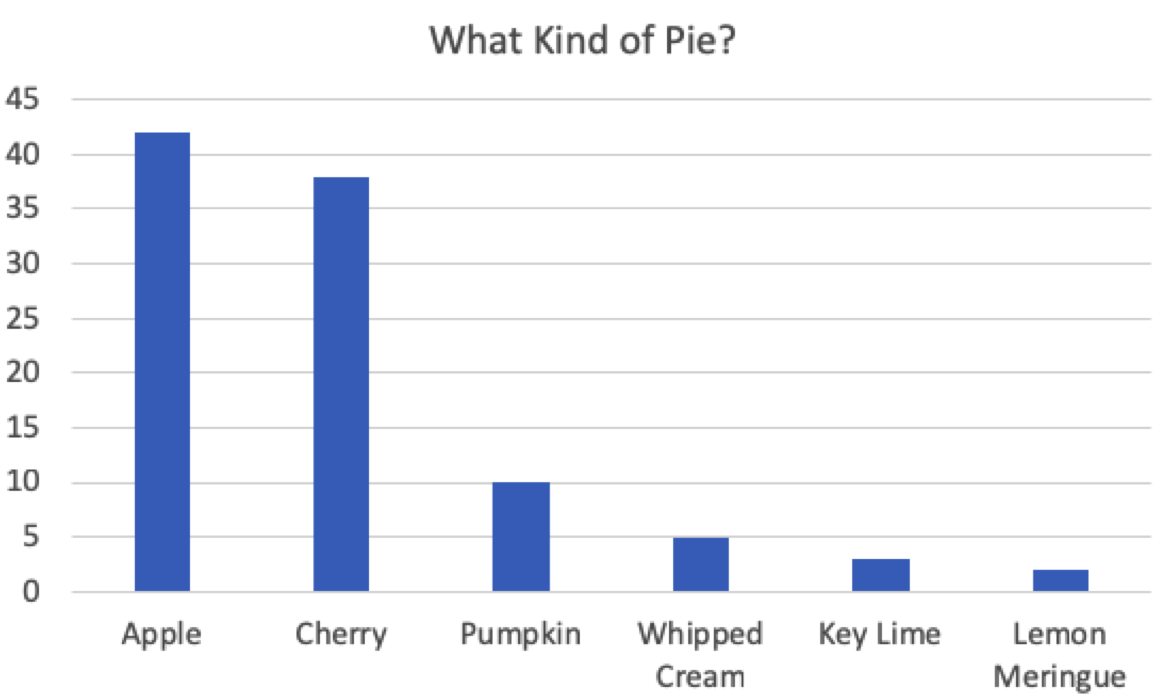

In [4]:
#Don't Peak!
Image(filename='pie-chart-bar.png') 

---

## 4. So How Should We (and how Can We) Do Dataviz?

#### Review:
- bar charts
- line chart
- scatterplot
- data tables

#### Fun New Shiny Things:
- treemap
- stacked bar charts
- box plots
- geographic maps

### Barcharts
Great for comparisons of multiple elements

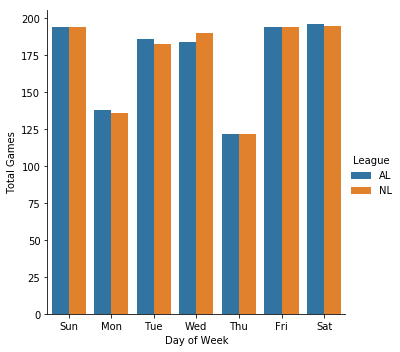

In [5]:
#This is from your class notes
#creating barcharts with seaborn
gamelogsDF = pd.read_csv("GL2016.TXT",header=None)
gamelogsDF.columns = range(1,162)
orderedDays = ["Sun","Mon","Tue","Wed","Thu","Fri","Sat"]
weekdayLeagueCrosstab = pd.crosstab(gamelogsDF[3],gamelogsDF[8])
stackedWeekdayLeague = weekdayLeagueCrosstab.stack()
weekdayLeagueDF = stackedWeekdayLeague.reset_index()
unstackedWeekdayLeague = weekdayLeagueCrosstab.unstack()
resetUnstackedWeekdayLeague = unstackedWeekdayLeague.reset_index()
resetUnstackedWeekdayLeague.columns = ["League","Day of Week","Total Games"]
sb.catplot(x="Day of Week",y="Total Games", hue="League", data=resetUnstackedWeekdayLeague, kind="bar",
          order=orderedDays)

In [6]:
weekdayLeagueCrosstab["AL"]

3
Fri    194
Mon    138
Sat    196
Sun    194
Thu    122
Tue    186
Wed    184
Name: AL, dtype: int64

### Stacked Bar Charts
We use stacked bar charts if there are specific items that have components that you want to bring to light.
Here's an example of when not to use a barchart, and when you might want to use one

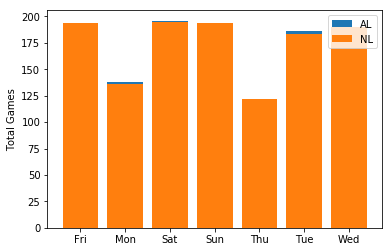

In [7]:
#Here's a way we can turn the bar chart from above into a stacked bar chart with matplotlib
p1 = plt.bar(weekdayLeagueCrosstab.index.values, weekdayLeagueCrosstab["AL"])
p2 = plt.bar(weekdayLeagueCrosstab.index.values, weekdayLeagueCrosstab["NL"])

plt.ylabel('Total Games')
plt.legend((p1[0], p2[0]), ('AL', 'NL'))

plt.show()
#though... this isn't a great example of a stacked bar chart
#usually this kind of visual looks better with data this is very different!

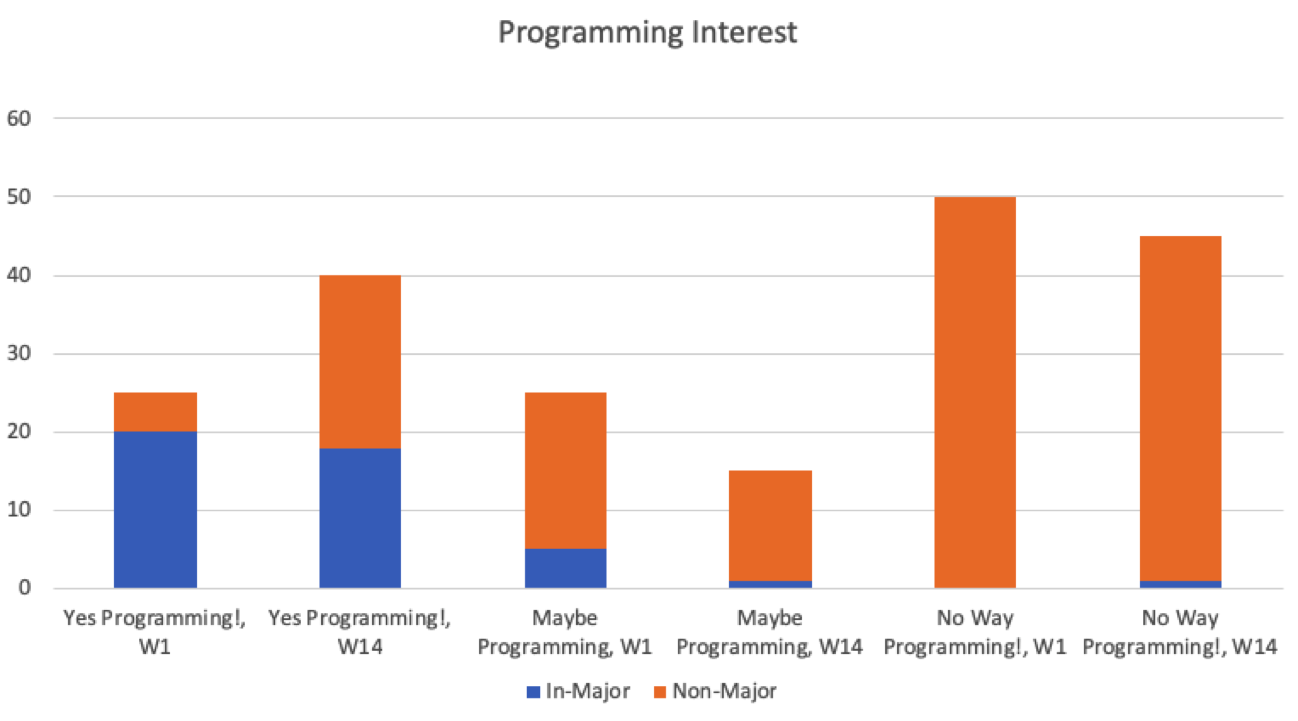

In [8]:
#this is a better example of a stacked bar chart
Image(filename='stacked-bar-chart.png') 

### Line Chart
These help you see changes over time. They are especially good if the data is continuous and/or you are analyzing something throughout time.

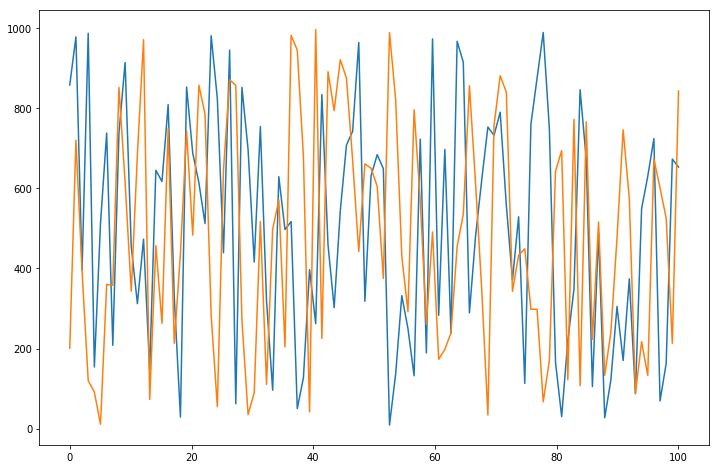

In [9]:
#this is one of the line charts from your class notes
x = np.linspace(0,100,100)
someY = np.random.randint(0,1000,size=100)
someY2 = np.random.randint(0,1000,size=100) 
plt.figure(figsize=(12,8))
plt.plot(x,someY)
plt.plot(x,someY2)

In [10]:
coloradoCOVID = covidDF[covidDF["state"] == "CO"]
coloradoCOVID.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
1617,20200305,CO,0.0,19.0,21.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40,19,19,8,0.0,0.0,0.0,0.0,0.0
1583,20200306,CO,2.0,46.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,78,48,48,8,0.0,0.0,27.0,2.0,29.0
1533,20200307,CO,8.0,55.0,69.0,0.0,0.0,0.0,0.0,0.0,...,0.0,132,63,63,8,0.0,0.0,9.0,6.0,15.0
1482,20200308,CO,8.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,112,112,112,8,0.0,0.0,49.0,0.0,49.0
1431,20200309,CO,9.0,133.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,142,142,142,8,0.0,0.0,29.0,1.0,30.0


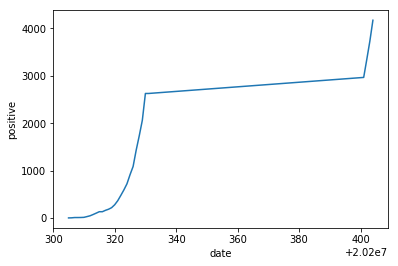

In [11]:
#Here you can see how it's helpful to use a line chart to see change over time!
#This is the colorado COVID-19 positive cases from the last semester
coloradoCOVID = covidDF[covidDF["state"] == "CO"]
#let's turn it into a line chart:

sb.lineplot(x=coloradoCOVID["date"],y=coloradoCOVID["positive"])

### Scatterplot
Scatterplots can help show the relationship between two variables

Text(0.5, 1.0, 'A Scatterplot')

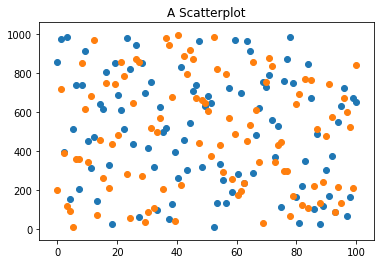

In [12]:
#this is from your class notes
plt.scatter(x,someY)
plt.scatter(x,someY2)
plt.title("A Scatterplot")
#you also might consider adding a trend line to your scatterplots
#to see something insightful!

### Data Tables

In [13]:
#you can tell an interesting story even with just a DataFrame!
#pandas has some cool "style" features you can check out
#we won't go over them here, but it's similar to the lambda function you learned on Friday
#look how fancy!
def _color_red_or_green(val):
    color = 'red' if val < 40000 else 'green'
    return 'color: %s' % color
gamelogsDF[[18]].style.applymap(_color_red_or_green)

### Treemap
Specific kinds of data look really informative in a treemap, especially if you want to show nested elements (parent and children elements) - like in this example of the allocation of the US budget


<img src="tree-chart.png" style="width: 700px;"/>


### Box Plots
Good for analyzing the median, mean, outliers, standard deviation (error), etc.. in a visually pleasing way

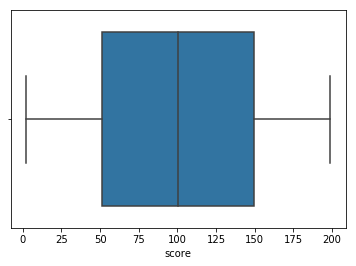

In [14]:
#here's an example of how to make a boxplot with seaborn
random_data = pd.DataFrame({'score':np.arange(2,200)})
sb.boxplot(data = random_data,x = 'score')

### Geographic Maps
There's so much to see with these!
Let's discuss & Google some stuff together:
- what is a basemap?
- what is a shapefile?
- what is a chloropleth?

In [17]:
#pandas has a nifty sister library... called geopandas! Perfect for plotting maps
import geopandas as gpd
#a really cool way to get data from the geopandas library
worldGeoDataFile = gpd.datasets.get_path('naturalearth_lowres')
worldDF = gpd.read_file(worldGeoDataFile)
worldDF.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


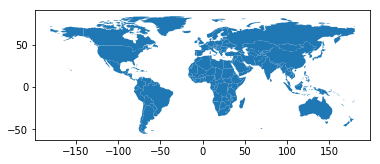

In [20]:
worldDF.plot()

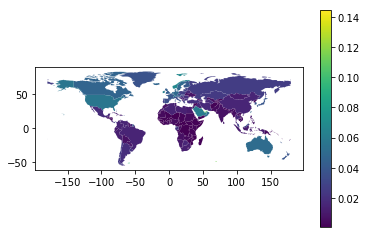

In [21]:
worldDF = worldDF[(worldDF['pop_est']>0) & (worldDF['name']!='Antarctica')]
worldDF['GDPPerCap'] = worldDF['gdp_md_est'] / worldDF['pop_est']
worldDF.plot(column='GDPPerCap', legend=True)

---

# And most importantly... have fun! Dataviz is like art + data science + coding :) how cool is that??

---

## Other super freaking cool data visualizations (and interactive ones too!)
Telling a story with data:
- https://www.nikon.com/about/sp/universcale/scale.htm
- http://drones.pitchinteractive.com/ (what are some ways this could be potentially misinformative?)

Inspiration:
- https://towardsdatascience.com/the-25-best-data-visualizations-of-2018-93643f0aad04
- https://blog.udacity.com/2015/01/15-data-visualizations-will-blow-mind.html
- https://www.tableau.com/learn/articles/best-beautiful-data-visualization-examples

Go explore!